#Ecuaciones de reacción-difusión

Las ecuaciones de reacción-difusión son un conjunto de Ecuaciones en Derivadas Parciales (EDP) que se usan para modelar una variedad de procesos en física, química, biología, ecología y ciencias sociales.

En esencia, modelan un sistema en el que agentes, tales como sustancias, información, animales, etc., se distribuyen de manera difusiva y reaccionan (interactúan) entre sí.

Un modelo muy famoso de reacción-difusión es el de Alan Turing para la morfogénesis (proceso biológico mediante el cual un organismo desarrolla su forma).

Es un sistema de dos componentes ($u$ y $v$) dado por las siguientes ecuaciones:
$$
\begin{align*}
\frac{\partial u}{\partial t} & = D_u \nabla^2 u + g_1(u, v)\\
\frac{\partial v}{\partial t} & = D_v \nabla^2 v + g_2(u, v)
\end{align*}
$$
donde $u$ y $v$ son las concentraciones de dos morfógenos (sustancias) que interactúan entre sí.
$\frac{\partial u}{\partial t}$ y $\frac{\partial v}{\partial t}$ representan las tasas de cambio de estas concentraciones con respecto al tiempo.
$D_u$ y $D_v$ son las tasas de difusión de las dos sustancias, que determinan cuán rápido se esparcen en el espacio.
Hasta ahí tendríamos dos sustancias que difunden de manera independiente. Los términos $g_1(u, v)$ y $g_2(u, v)$ son las funciones de reacción que describen cómo las dos sustancias interactúan entre sí.

Vamos a usar el siguiente ejemplo:
$$
\begin{align*}
g_1(u, v) &= u - u^3 - v + a\\
g_2(u, v) &= b(u - v)
\end{align*}
$$
donde $a$ y $b$ son parámetros constantes del sistema.

La función de reacción $g_1(u, v) = u - u^3 - v + a$ modela una situación en la que la tasa de cambio de la concentración de $u$ se ve afectada no solo por la concentración de $v$, sino también por el término $u - u^3$. El término $u^3$ introduce una **no linealidad** que puede dar lugar a comportamientos complejos.

La función de reacción $g_2(u, v) = b(u - v)$ modela una situación en la que la tasa de cambio de la concentración de $v$ es proporcional a la diferencia entre las concentraciones de $u$ y $v$. Esto podría modelar, por ejemplo, una situación en la que la sustancia $v$ se produce o se degrada a una tasa que depende de la concentración de $u$.

Este modelo tiene similaridades con el modelo  FitzHugh-Nagumo (FHN) que busca describir cómo se disparan las neuronas. Para un análisis muy detallado ver <a name="cite_ref-FHN"></a>[[1]](#cite_note-FHN)

El equilibrio entre la reacción y la difusión, representado por estas ecuaciones, puede dar lugar a una variedad de patrones dependiendo de los valores de los parámetros. Turing demostró que incluso cuando inicialmente las concentraciones de $u$ y $v$ son uniformes, pequeñas perturbaciones pueden llevar a la formación de patrones complejos si las tasas de difusión de las dos sustancias son suficientemente diferentes.


<a name="cite_note-FHN"></a>1. [^](#cite_ref-FHN) Rocsoreanu, Carmen, Adelina Georgescu, and Nicolaie Giurgiteanu. The FitzHugh-Nagumo model: bifurcation and dynamics. Vol. 10. Springer Science & Business Media, 2012.

<a name="cite_note-MB"></a>2. [^](#cite_ref-MB) Murray, James Dickson, and James Dickson Murray. Mathematical Biology: II: Spatial Models and Biomedical Applications. Vol. 3. New York: springer, 2003.

## Resolución numérica del modelo de reacción-difusión usando FTCS

En el código de más abajo se resuelve el modelo de reacción-difusión en una dimensión espacial usando el método FTCS.
Se usan condiciones periódicas de contorno.


In [ ]:
# @title

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Parámetros
Du, Dv = 1.0, 10
a, b = 0.005, 1
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 210  # longitud del dominio
T = 50  # tiempo total de la simulación

# Para el gráfico
saltear = 500  # número de pasos de tiempo a omitir entre cuadros

Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# Inicializa los u y v al azar N(0,0.1) en cada punto del espacio (Nx puntos)
u = np.random.normal(scale=0.1, size=Nx)
v = np.random.normal(scale=0.1, size=Nx)

# Definiciones de g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano usando condiciones de contorno periódicas
# Derivada segunda centrada
def laplaciano1D(Z):
    Zizquierda = np.roll(Z, -1)
    Zderecha = np.roll(Z, 1)
    return (Zderecha - 2*Z + Zizquierda) / dx**2

# Configurar la figura y los ejes...
fig, ax = plt.subplots(figsize=(5,3))
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('Concentración')
linea_u, = ax.plot([], [], label='u')
linea_v, = ax.plot([], [], label='v')

# Para la animación:
# función de inicialización: fondo de cada cuadro
def inicializar():
    linea_u.set_data([], [])
    linea_v.set_data([], [])
    ax.legend()
    return linea_u, linea_v

# función de animación: se llama secuencialmente por FuncAnimation
def animar(i):
    global u, v
    for _ in range(saltear):  # este bucle se usa para *saltear* pasos de tiempo
        # Calcular el laplaciano
        laplaciano_u = laplaciano1D(u)
        laplaciano_v = laplaciano1D(v)
        # Método de Euler (hacia adellante en el tiempo)
        u += dt * (Du * laplaciano_u + g1(u, v))
        v += dt * (Dv * laplaciano_v + g2(u, v))
    # Actualiza los datos para graficar
    datos_x = np.arange(Nx)*dx
    linea_u.set_data(datos_x, u)
    linea_v.set_data(datos_x, v)
    return linea_u, linea_v

# Crear animación
ani = FuncAnimation(fig, animar, frames=int(Nt/saltear), init_func=inicializar, blit=True)

# Ajusta para que se vean los nombres de los ejes.
plt.tight_layout()

# Mostrar la animación
plt.close(fig)
HTML(ani.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

Vemos que a tiempos largos el sistema equilibra (va a una situación independiente del tiempo) y que se forma un patrón.

* ¿Cómo verificaría que es una situación de equilibrio numéricamente?
* ¿Qué otras verificaciones habría que hacer para analizar si la solución es correcta?
* Jugar un poco con los parámetros de $g_1$ y $g_2$ puede ayudar a entender el comportamiento del sistema. ¿Qué controla la longitud de onda del patrón? ¿Y la amplitud?


## Dos dimensiones espaciales
Resolución en 2 dimensiones espaciales usando una mallado cuadrado.

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros
Du, Dv = 1.0, 10
a, b = 0.005, 1
dx = 1.0  # Discretización espacial
dt = 0.001  # Paso del tiempo
L = 100  # longitud del dominio
T = 100  # tiempo total


Nx = int(L/dx)  # número de puntos en el espacio
Nt = int(T/dt)  # número de puntos en el tiempo

# para graficar
Nframes = 200
saltea  = int(Nt/Nframes)


# Inicializa u y v
u = np.random.normal(scale=0.1, size=(Nx, Nx))
v = np.random.normal(scale=0.1, size=(Nx, Nx))


""" Condición inicial simétrica
sigma = 5
x = np.linspace(0, Nx-1, Nx)
y = np.linspace(0, Nx-1, Nx)
x, y = np.meshgrid(x, y)

mu_x = Nx / 2
mu_y = Nx / 2

u = np.exp(-((x - mu_x)**2 / (2 * sigma**2) + (y - mu_y)**2 / (2 * sigma**2)))
v = u.copy()
"""
# Definimos g1 y g2
def g1(u, v):
    return u - u**3 - v + a

def g2(u, v):
    return b*(u - v)

# Función Laplaciano 2D centrado usando condiciones periódicas
def laplaciano2D(Z):
    Zarriba = np.roll(Z, 1, axis=0)
    Zizquierda = np.roll(Z, 1, axis=1)
    Zabajo = np.roll(Z, -1, axis=0)
    Zderecha = np.roll(Z, -1, axis=1)
    return (Zarriba + Zizquierda + Zabajo + Zderecha - 4*Z) / dx**2

# Preparar la figura
fig, axs = plt.subplots(2, 1, figsize=(5, 11))

# Inicializar imágenes
img1 = axs[0].imshow(u, cmap='RdBu', interpolation='nearest')
img2 = axs[1].imshow(v, cmap='RdBu', interpolation='nearest')

# Función para actualizar la trama
def update(t):
    global u, v
    for _ in range(saltea):
        # Calcular laplaciano
        laplaciano_u = laplaciano2D(u)
        laplaciano_v = laplaciano2D(v)
        # Método de Euler
        u += dt * (Du * laplaciano_u + g1(u, v))
        v += dt * (Dv * laplaciano_v + g2(u, v))
    img1.set_array(u)
    img2.set_array(v)
    axs[0].set_title(f'$u(x,y,{t*dt:.2f})$')
    axs[1].set_title(f'$v(x,y,{t*dt:.2f})$')

# Crear animación
ani = FuncAnimation(fig, update, frames=Nframes, interval=50)

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.close(fig)
HTML(ani.to_jshtml())


Output hidden; open in https://colab.research.google.com to view.

Patrones similares aparecen en algunos animales, como el [pez disco](https://es.wikipedia.org/wiki/Symphysodon).

![Pez disco](https://upload.wikimedia.org/wikipedia/commons/7/76/Blue_Discus.jpg "Pez disco (Wikipedia)")






## Análisis del modelo

El análisis teórico de este modelo excede lo que se busca lograr en este curso, pero veamos brevemente algunos pasos en esa dirección.

Lo primero que podemos ver es que el sistema admite soluciones estacionarias ($u$ y $v$ no dependen del tiempo) y uniformes ($u$ y $v$ no dependen de la posición).

Para esas soluciones las derivadas de la ecuación de difusión se anulan, así que necesariamente se debe cumplir que:
$$
\begin{align*}
g_1(u,v)&= u - u^3 - v + a&=0\\
g_2(u,v)&= b(u - v)& =0
\end{align*}
$$
De la segunda ecuación obtenemos que $u=v$ y usando eso en la primera obtenemos:
$$
u(x,y,t)= a^{1/3}
$$
y
$$
v(x,y,t)= a^{1/3}.
$$
que es la solución real uniforme y estacionaria que buscábamos.

Si tomamos $$u = a^{1/3} +\delta_u(x,y,t)$$ y $$v = a^{1/3} +\delta_v(x,y,t),$$ podemos ver qué ocurre cuando perturbamos esta solución con variaciones $\delta_u$ y $\delta_v$ $\ll a^{1/3}$.

Reemplazando y descartando potencias de $\delta$ mayores a uno, obtenemos
$$
\begin{align*}
\frac{\partial \delta_u}{\partial t} & = D_u \nabla^2 \delta_u + (1-3a^{2/3})\delta_u - \delta_v\\
\frac{\partial \delta_v}{\partial t} & = D_v \nabla^2 \delta_v+ b(\delta_u - \delta_v)
\end{align*}
$$

La ventaja de esto es que ahora las ecuaciones son lineales y podemos trabajar en el espacio de Fourier sin que se nos mezclen los modos con diferente $k$. Esto es parecido a lo que hicimos para analizar la estabilidad del método FTCS.

Si en el transcurso de la evolución del sistema los $\delta$ comienzan a crecer, en algún momento estas ecuaciones van a dejar de ser válidas. Esto es, son válidas en un entorno de la solución uniforme.

Vamos a analizar cómo se comporta el sistema al introducir una modulación (perturbativa) de la concentración de $u$ y $v$ alrededor del punto fijo uniforme. Para eso proponemos una modulación con vector de onda $\mathbf{k}$ de la siguiente forma:
$$
\delta_u(x,y,t) = \epsilon_u e^{ \lambda t} e^{i \mathbf{k}\cdot \mathbf{r}}
$$
$$
\delta_v(x,y,t) = \epsilon_v e^{ \lambda t} e^{i \mathbf{k}\cdot \mathbf{r}}
$$
donde $\mathbf{r}=(x,y)$ y $\mathbf{k}=(k_x,k_y)$.

Reemplazando en las ecuaciones obtenemos:
$$
 \lambda \epsilon_u = -D_u k^2\epsilon_u+  (1-3a^{2/3})\epsilon_u - \epsilon_v\\
$$
$$
 \lambda \epsilon_v = -D_v k^2\epsilon_v+  b(\epsilon_u - \epsilon_v)
$$
Para que esto tenga soluciones no triviales ($\epsilon_u=\epsilon_v=0$ es solución trivial) pedimos que el determinante de este sistema sea cero.
Esto es:
$$
\left|\begin{matrix}
\lambda +D_u k^2- (1-3 a^{2/3})& 1\\
-b & \lambda +D_v k^2+b
\end{matrix}\right|=0,
$$
lo que nos permite obtener $\lambda(k)$.

Si $\lambda(k)< 0 $ la perturbación decae en el tiempo y la solución uniforme es estable para ese $\mathbf{k}$. Si $\lambda(k) > 0$ quiere decir que la perturbación aumenta exponencialmente para ese $k$ lo que puede indicar una modulación con ese vector de onda.

Si hay varios valores de $k$ para los cuales $\lambda(k)> 0$, es posible que la modulación esté dominada por el $k$ asociado al $\lambda$ más positivo.  


Tomamos $D_u=1$, $D_v=10$, $b=1$, $a=0.005$ y graficamos la parte real de las dos soluciones para $\lambda(k)$:



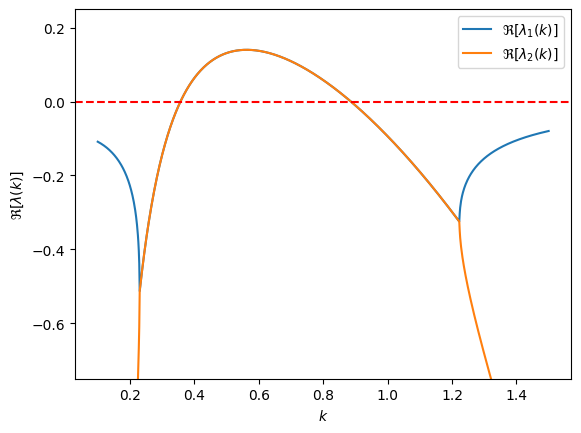

In [ ]:
  # @title
import numpy as np
import matplotlib.pyplot as plt

def lambda_values(k):
    inner_sqrt = 1 - 21.7544 * k**2 + 63.2254 * k**4 - 182.456 * k**6 + 100 * k**8
    sqrt_term = np.sqrt(inner_sqrt + 0j) # el +0j es para que trabaje con números complejos
    common_term = 0.05 - 0.45614 * k**2 + 0.5 * k**4
    result1 =- (common_term - 0.05 * sqrt_term) / k**2
    result2 = -(common_term + 0.05 * sqrt_term) / k**2
    return np.real(result1), np.real(result2)

k_values = np.linspace(0.1, 1.5, 1000)
eq1_values, eq2_values = lambda_values(k_values)

plt.plot(k_values, eq1_values, label='$\\Re[\\lambda_1(k)]$')
plt.plot(k_values, eq2_values, label='$\\Re[\\lambda_2(k)]$')
plt.xlabel('$k$')
plt.ylabel('$\\Re[\\lambda(k)]$')
plt.axhline(y = 0.0, color = 'r', linestyle = '--')
plt.ylim([-0.75,0.25])
plt.legend()
plt.show()
